<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
df_products = pd.read_csv('/datasets/products.csv',sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv',sep=';')
df_departments = pd.read_csv('/datasets/departments.csv',sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv',sep=';')

In [3]:
# mostrar información del DataFrame
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de leer los datos y buenas observaciones iniciales.<br/>
    
La razón del porque no te aparecen todos los valores del dataframe `df_order_products` es porque es contiene mucha información y pandas trata de optimizar esto al no mostrar los resultados, pero le podemos indicar que lo haga de cualquier manera utilizando el siguiente argumento:
    
```
df_order_products.info(show_counts=True)    
```    
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
- Los datasets venian separados por ';' que fue un detalle que pude notar hasta que llame a la función .info(). Casi todos los dataframes estan sin datos faltantes excepto por df_products y df_order_products aunque este ultimo es más grande que los demas y quizá por eso no se despliega el número de datos nulos.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
df_orders[df_orders.duplicated(keep=False)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
99462,794638,50898,24,3,2,2.0
119251,408114,68324,4,3,2,18.0
142258,2845099,31189,11,3,2,7.0
145574,794638,50898,24,3,2,2.0
164581,1112182,202304,84,3,2,6.0
200059,1782114,106752,1,3,2,NaN
204042,2125197,14050,48,3,2,3.0
215294,2160484,107525,16,3,2,30.0
223105,2160484,107525,16,3,2,30.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
- Si hay líneas duplicadas y todas se hicieron el mismo día a la misma hora.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)].groupby('order_dow').agg('count')

,order_id,user_id,order_number,order_hour_of_day,days_since_prior_order
order_dow,,,,,
3,121,121,121,121,114


¿Qué sugiere este resultado?
- que hay 121 pedidos que se hicieron el miércoles a las 2:00 a.m.

In [10]:
# Elimina los pedidos duplicados
df_orders.drop_duplicates(inplace=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_orders[df_orders['order_id'].duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos
Había 121 datos duplicados dentro de df_orders que se encontraban en el mismo día a la misma hora, todos estos datos los eliminé.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los duplicados fueron eliminados correctamente
</div>


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
df_products[df_products.duplicated(keep=False)]

,product_id,product_name,aisle_id,department_id


In [14]:
# Revisa únicamente si hay ID de productos duplicados
df_products[df_products['product_id'].duplicated(keep=False)]

,product_id,product_name,aisle_id,department_id


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products[df_products['product_name'].str.upper().duplicated(keep=False)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,Biotin 1000 mcg,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
sin_faltante = df_products[~df_products['product_name'].isna()]
sin_faltante[sin_faltante['product_name'].duplicated(keep=False)]

,product_id,product_name,aisle_id,department_id


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Más que duplicados este dataframe tenía valores faltantes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los datos han sido revisados apropiadamente
</div>


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
df_departments[df_departments.duplicated(keep=False)]

,department_id,department


In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
df_departments[df_departments['department_id'].duplicated(keep=False)]

,department_id,department


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- No hay duplicados dentro de este dataframe.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
df_aisles[df_aisles.duplicated(keep=False)]

,aisle_id,aisle


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
df_aisles[df_aisles['aisle_id'].duplicated(keep=False)]

,aisle_id,aisle


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- No hay duplicados en este dataframe.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
df_order_products[df_order_products.duplicated(keep=False)]

,order_id,product_id,add_to_cart_order,reordered


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products.groupby('product_id')['order_id'].agg('count')

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: order_id, Length: 45573, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Estos últimos dataframes no cuentan con filas totalmente duplicadas.

</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- No había duplicados y no encontre otra forma de buscarlos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products['product_name'].isna().sum()

1258

Describe brevemente cuáles son tus hallazgos.
- Hay 1258 valores ausentes en la columna product_name de data frame df_products.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products[df_products['aisle_id'] == 100].isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Describe brevemente cuáles son tus hallazgos.
- Hay 1258 valores ausentes, son los mismos que en el ejercicio pasado solo que especificamente del pasillo 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products[df_products['department_id'] == 21].isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Describe brevemente cuáles son tus hallazgos.
- Son los mismos 1258 valores ausentes.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_departments[df_departments['department_id'] == 21])
print(df_aisles[df_aisles['aisle_id'] == 100])

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.
- Tanto el pasillo con id 100 como el departamento con id 21 tienen valores ausentes.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown',inplace=True)
df_products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Rellene los valores ausentes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


### `orders` data frame

In [28]:
# Encuentra los valores ausentes
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_orders[df_orders['order_number'] == 1].isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- No, todos los valores ausentes pertenecen al primer pedido del cliente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de revisar los datos y encontrar que no hay ausentes que no sean un primer pedido
</div>


### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f'Valor mínimo: ', df_order_products['add_to_cart_order'].min())
print(f'Valor máximo: ', df_order_products['add_to_cart_order'].max())
print()
df_order_products['add_to_cart_order'].describe()

Valor mínimo:  1.0
Valor máximo:  64.0



count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

Describe brevemente cuáles son tus hallazgos.
- El valor mínimo es 1 y el valor máximo es 64.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_valor_ausente = df_order_products[df_order_products['add_to_cart_order'].isna()]
df_valor_ausente

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
conteo_pedidos=df_valor_ausente.groupby('order_id')['product_id'].agg('count')
(conteo_pedidos > 64).sum()

0

In [34]:
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
conteo_pedidos

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

In [35]:
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
df_valor_ausente.groupby('order_id')['product_id'].agg(['count','min'])

,count,min
order_id,,
9310,1,25753
61355,63,1087
102236,31,2635
129627,5,13852
165801,6,4137
...,...,...
2999801,6,1710
3125735,22,1935
3308010,51,4297


Describe brevemente cuáles son tus hallazgos.
- No hay pedidos con mas de 64 productos.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>
    
El valor minimo para ordenes que tienen valores nulos es `65`, te dejo el código en la celda de abajo
</div>


In [37]:
# Código del revisor
df_order_products[df_order_products['order_id'].isin(df_valor_ausente['order_id'])].groupby('order_id')['product_id'].count().min()

65

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999,inplace=True)
df_order_products['add_to_cart_order'].astype(int)
df_order_products['add_to_cart_order'].isna().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [38]:
df_orders[(df_orders['order_hour_of_day'] < 0) | (df_orders['order_hour_of_day'] > 23)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [39]:
df_orders[(df_orders['order_dow'] < 0) | (df_orders['order_dow'] > 6)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Escribe aquí tus conclusiones
- No hay valores sensibles.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Se verificó que los datos sean sensibles correctamente
</div>


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:title={'center':'Cantidad de ordenes al día por hora'}, xlabel='Hora del día', ylabel='Cantidad de pedidos'>

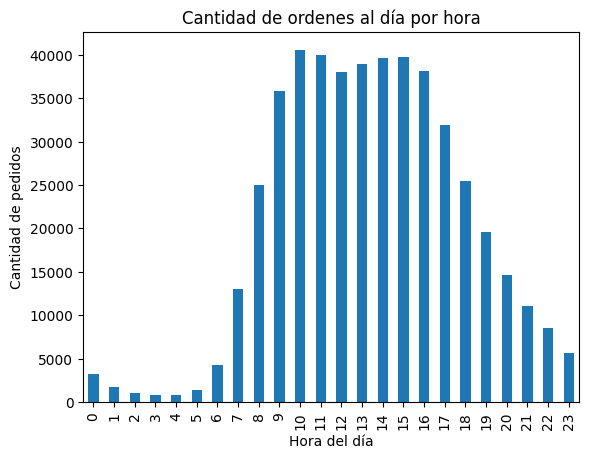

In [40]:
df_orders.groupby('order_hour_of_day')['order_id'].count().plot(kind='bar',title='Cantidad de ordenes al día por hora',xlabel='Hora del día',ylabel='Cantidad de pedidos')

Escribe aquí tus conclusiones
- Entre las 8 y las 17 hrs es cuando más pedidos hay.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de presentar los datos
</div>


### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:title={'center':'Compra de víveres por día'}, xlabel='Días de la semana (0=Domingo)', ylabel='Canitdad de pedidos'>

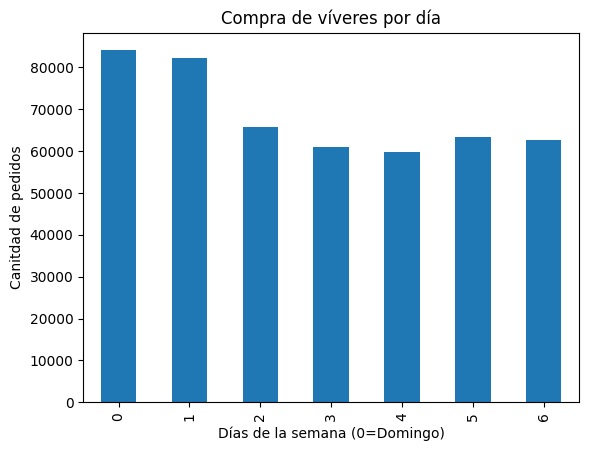

In [41]:
df_orders.groupby('order_dow')['order_id'].count().plot(kind='bar',title='Compra de víveres por día',xlabel='Días de la semana (0=Domingo)',ylabel='Canitdad de pedidos')

Escribe aquí tus conclusiones
- Los días con más pedidos son el domingo y el lunes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Los domingos son los días preferidos de los clientes
</div>


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:title={'center':'Tiempo de espera en días para hacer pedidos'}, xlabel='Cantidad de días', ylabel='Frecuencia de pedidos'>

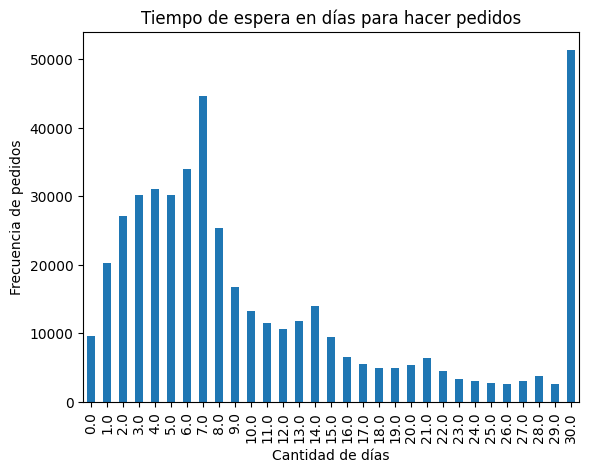

In [42]:
df_orders.groupby('days_since_prior_order')['order_dow'].count().plot(kind='bar',title='Tiempo de espera en días para hacer pedidos',xlabel='Cantidad de días',ylabel='Frecuencia de pedidos')

Escribe aquí tus conclusiones
- el máximo es cuando se cumple un mes desde el último pedido y el mínimo es poco antes del mes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son correctos
<br />
Hasta este punto no podemos saber si realmente los usuarios esperan 30 días para realizar otra compra o es el sistema el que agrupa todas las compras que sean mayores a 30 días en el día 30. Con la gráfica podemos observar que la mayoría de usuarios se concentra entre 1 y 9 días donde después los números descienden gradualmente
</div>


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [43]:
miercoles=df_orders[df_orders['order_dow'] == 3]

In [44]:
sabado=df_orders[df_orders['order_dow'] == 6]

<AxesSubplot:title={'center':'Comparación de la distribución: Sabado vs Miércoles'}, xlabel='Hora del día', ylabel='Cantidad de ordenes'>

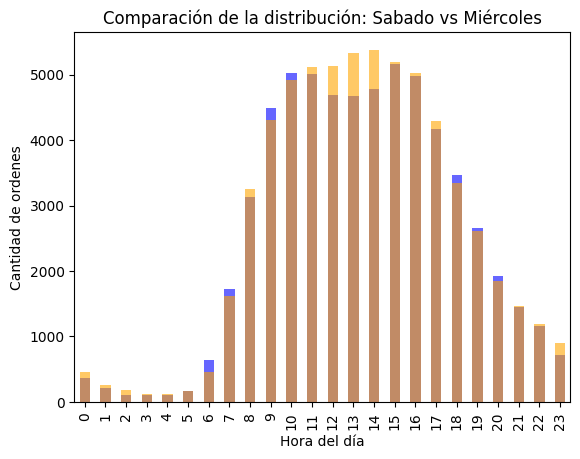

In [45]:
ax=miercoles.groupby('order_hour_of_day')['order_id'].count().plot(kind='bar',color='blue',alpha=.6)
sabado.groupby('order_hour_of_day')['order_id'].count().plot(kind='bar',ax=ax,alpha=.6,color='orange',title='Comparación de la distribución: Sabado vs Miércoles',ylabel='Cantidad de ordenes',xlabel='Hora del día')

Escribe aquí tus conclusiones
- Las distribuciones son parecidas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!
<br />
Buena manera de mostrar los resultados de ambos días en una misma grafica
</div>


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [46]:
df_clientes_ordenes = df_orders.merge(df_order_products,on='order_id')
df_clientes_ordenes

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048,1.0,1
1,1515936,183418,11,6,13,30.0,47766,3.0,1
2,1515936,183418,11,6,13,30.0,45066,9.0,0
3,1515936,183418,11,6,13,30.0,24082,11.0,0
4,1515936,183418,11,6,13,30.0,24363,4.0,0
...,...,...,...,...,...,...,...,...,...
4545002,2071924,1730,18,1,14,15.0,1503,17.0,0
4545003,2071924,1730,18,1,14,15.0,4778,12.0,1
4545004,2071924,1730,18,1,14,15.0,11512,1.0,1
4545005,2071924,1730,18,1,14,15.0,4920,6.0,1


In [47]:
df_clientes_ordenes.groupby('user_id')['order_id'].count().describe()

count    149626.000000
mean         30.375784
std          35.873511
min           1.000000
25%           9.000000
50%          18.000000
75%          38.000000
max         580.000000
Name: order_id, dtype: float64

<AxesSubplot:title={'center':'Distribución del número de pedidos por cliente'}, ylabel='Frequency'>

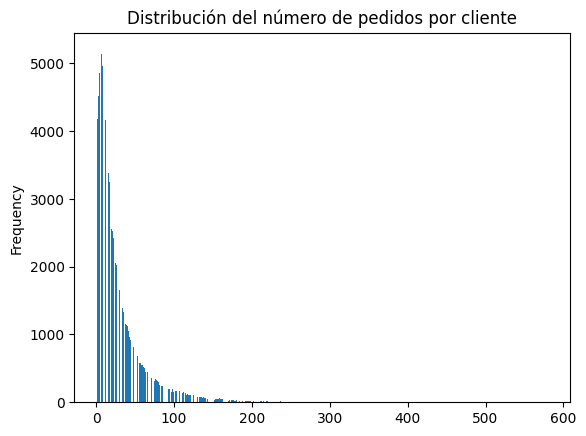

In [48]:
df_clientes_ordenes.groupby('user_id')['order_id'].count().plot(kind='hist',bins=1000,title='Distribución del número de pedidos por cliente',xlabel='Cantidad de pedidos',ylabel='Cantidad de clientes')

Escribe aquí tus conclusiones
- En promedio los clientes han hecho 30 pedidos pero hay clientes que han hecho hasta 580.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 

La mayoría de usuarios no ha hecho muchos pedidos, buenas observaciones.

</div>


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
df_merge=df_order_products.merge(df_products,on='product_id')
df_merge

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,Chicken Breast Tenders Breaded,129,1
1,147172,11440,7.0,1,Chicken Breast Tenders Breaded,129,1
2,3341719,11440,4.0,1,Chicken Breast Tenders Breaded,129,1
3,1938779,11440,8.0,1,Chicken Breast Tenders Breaded,129,1
4,1728338,11440,23.0,0,Chicken Breast Tenders Breaded,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14.0,0,Sweet Teriyaki Chicken Oven Sauce,5,13
4545003,2621676,25201,10.0,0,Crisp Waters Candle Scents,101,17
4545004,937623,49153,2.0,0,Shine Collection Brillance Shampoo,22,11
4545005,532895,8182,1.0,0,Total Mint Stripe Gel Toothpaste,20,11


In [50]:
df_merge.groupby(['product_name','product_id'])['product_id'].count().sort_values(ascending=False).head(20)#.plot(kind='bar')

product_name              product_id
Banana                    24852         66050
Bag of Organic Bananas    13176         53297
Organic Strawberries      21137         37039
Organic Baby Spinach      21903         33971
Organic Hass Avocado      47209         29773
Organic Avocado           47766         24689
Large Lemon               47626         21495
Strawberries              16797         20018
Limes                     26209         19690
Organic Whole Milk        27845         19600
Organic Raspberries       27966         19197
Organic Yellow Onion      22935         15898
Organic Garlic            24964         15292
Organic Zucchini          45007         14584
Organic Blueberries       39275         13879
Cucumber Kirby            49683         13675
Organic Fuji Apple        28204         12544
Organic Lemon             5876          12232
Apple Honeycrisp Organic  8277          11993
Organic Grape Tomatoes    40706         11781
Name: product_id, dtype: int64

<AxesSubplot:xlabel='Productos con su ID', ylabel='Frecuencia que se ha pedido un producto'>

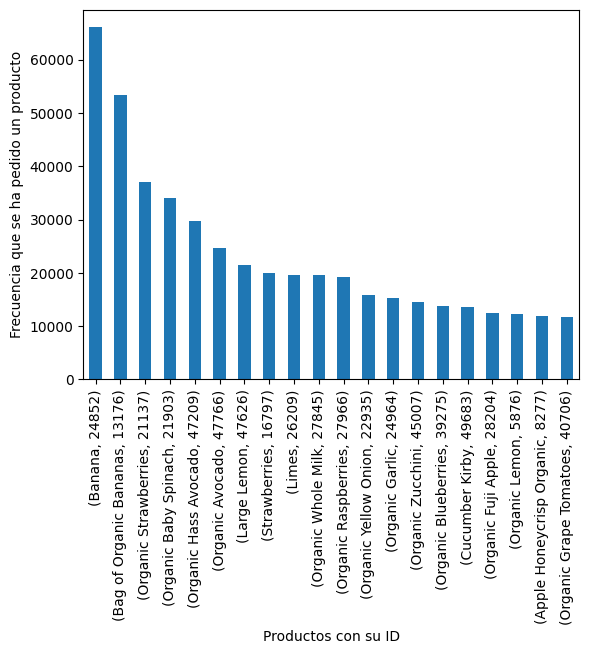

In [51]:
df_merge.groupby(['product_name','product_id'])['product_id'].count().sort_values(ascending=False).head(20).plot(kind='bar',xlabel='Productos con su ID',ylabel='Frecuencia que se ha pedido un producto')

Escribe aquí tus conclusiones
- El producto que más se compra son bananas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son acertados!<br/>
Los clientes tienden a comprar productos naturales, buena manera de mostrar los resultados
</div>


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
df_merge.groupby('order_id')['product_id'].count().sort_values(ascending=False).describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

<AxesSubplot:title={'center':'Distribución de la cantidad de articulos que compra una persona en un pedido'}, ylabel='Frequency'>

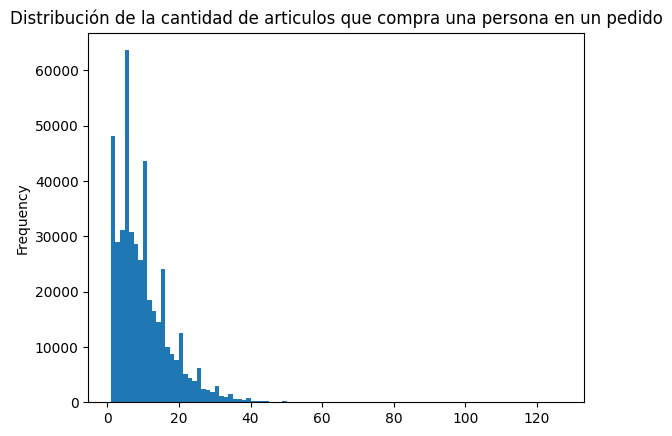

In [53]:
df_merge.groupby('order_id')['product_id'].count().sort_values(ascending=False).plot(kind='hist',bins=100,title='Distribución de la cantidad de articulos que compra una persona en un pedido',xlabel='Cantidad de articulos',ylabel='Frecuencia con la que se hacen pedidos')

Escribe aquí tus conclusiones
- En promedio la gente compra 10 articulos pero hay personas que han comprado hasta 127 articulos, esto puede ser un error o valores atípicos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, el resultado es correcto, los usuarios suelen pedir alrededor de 10 articulos
</div>


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

<AxesSubplot:title={'center':'Los 20 artículos con la mayor frecuencia de recompra'}, xlabel='Artículo con ID', ylabel='Frecuencia de Recompra'>

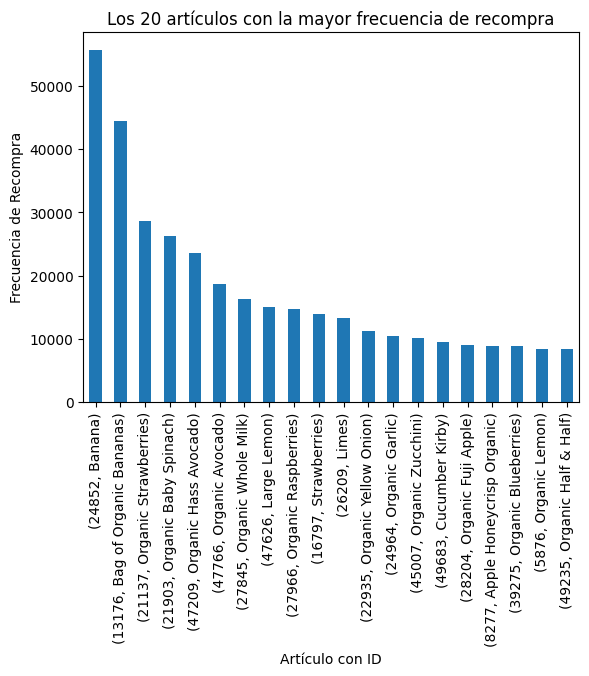

In [54]:
df_merge[df_merge['reordered'] == 1].groupby(['product_id','product_name']).size().sort_values(ascending=False).head(20).plot(kind='bar',title='Los 20 artículos con la mayor frecuencia de recompra',xlabel='Artículo con ID',ylabel='Frecuencia de Recompra')

Escribe aquí tus conclusiones
- El producto que mas se recompra son las bananas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 
Buena manera de mostrar los resultados, los productos naturales son consistentemente los más vendidos
</div>


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [55]:
total_pedidos = df_order_products.groupby('product_id').size().reset_index(name='total_pedidos')
total_pedidos

,product_id,total_pedidos
0,1,280
1,2,11
2,3,42
3,4,49
4,7,2
...,...,...
45568,49690,5
45569,49691,72
45570,49692,12
45571,49693,25


In [56]:
reordenados = df_order_products[df_order_products['reordered'] == 1].groupby('product_id').size().reset_index(name='reordenados')
reordenados

,product_id,reordenados
0,1,158
1,3,31
2,4,25
3,7,1
4,8,6
...,...,...
36223,49690,4
36224,49691,31
36225,49692,5
36226,49693,11


In [57]:
df_final=total_pedidos.merge(reordenados, on='product_id').fillna(0)
df_final

,product_id,total_pedidos,reordenados
0,1,280,158
1,3,42,31
2,4,49,25
3,7,2,1
4,8,19,6
...,...,...,...
36223,49690,5,4
36224,49691,72,31
36225,49692,12,5
36226,49693,25,11


count    36228.000000
mean         0.486458
std          0.211266
min          0.010989
25%          0.333333
50%          0.500000
75%          0.616071
max          1.000000
Name: proporcion, dtype: float64



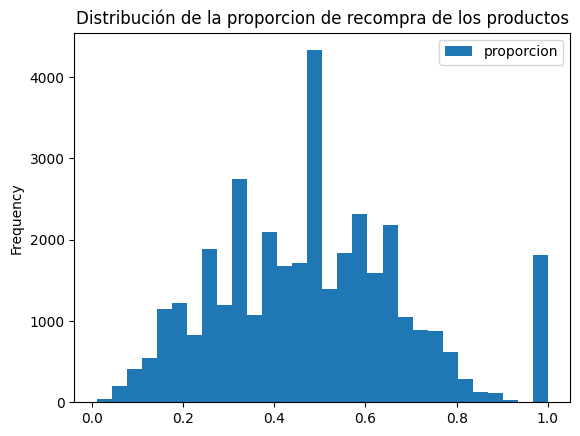

In [58]:
df_final['proporcion']=df_final['reordenados']/df_final['total_pedidos']
print(df_final['proporcion'].describe())
print()
df_final.plot(x='product_id',y='proporcion',kind='hist',bins=30,title='Distribución de la proporcion de recompra de los productos');

Escribe aquí tus conclusiones
- La distribución de la proporción de recompra se comporta de manera normal aunque hay una gran cantidad de productos que tienen una gran proporción de recompra.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
total_productos=df_clientes_ordenes.groupby('user_id').size().reset_index(name='total_productos')
total_productos

,user_id,total_productos
0,2,26
1,4,2
2,5,12
3,6,4
4,7,14
...,...,...
149621,206203,27
149622,206206,21
149623,206207,46
149624,206208,125


In [60]:
reordenado_por_usuarios=df_clientes_ordenes[df_clientes_ordenes['reordered']==1].groupby('user_id').size().reset_index(name='productos_reordenados')
reordenado_por_usuarios

,user_id,productos_reordenados
0,2,1
1,5,8
2,7,13
3,11,3
4,12,3
...,...,...
132986,206203,6
132987,206206,15
132988,206207,41
132989,206208,87


In [61]:
df_proporciones=total_productos.merge(reordenado_por_usuarios,on='user_id').fillna(0)
df_proporciones['productos_reordenados']=df_proporciones['productos_reordenados']/df_proporciones['total_productos']
df_proporciones

,user_id,total_productos,productos_reordenados
0,2,26,0.038462
1,5,12,0.666667
2,7,14,0.928571
3,11,15,0.200000
4,12,12,0.250000
...,...,...,...
132986,206203,27,0.222222
132987,206206,21,0.714286
132988,206207,46,0.891304
132989,206208,125,0.696000


count    132991.000000
mean          0.556751
std           0.248833
min           0.014925
25%           0.363636
50%           0.562500
75%           0.750000
max           1.000000
Name: productos_reordenados, dtype: float64



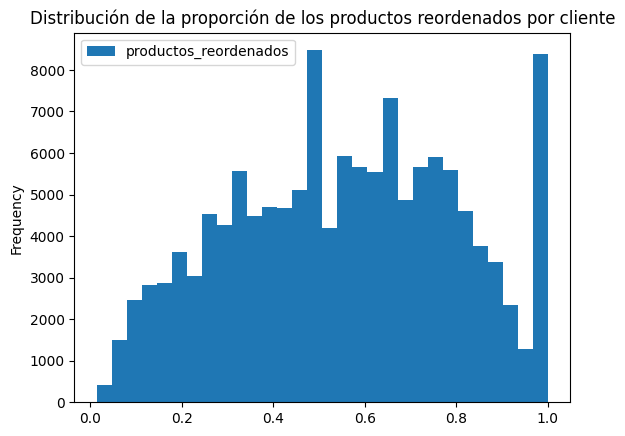

In [62]:
print(df_proporciones['productos_reordenados'].describe())
print()
df_proporciones.plot(x='user_id',y='productos_reordenados',kind='hist',bins=30,title='Distribución de la proporción de los productos reordenados por cliente');

Escribe aquí tus conclusiones
- Las proporciones con las que los usuarios reordenan productos se comportan de manera normal con una media de .55.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de realizar las proporciones
</div>


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [63]:
primeros_productos=df_order_products[df_order_products['add_to_cart_order']==1]
primeros_productos=primeros_productos.merge(df_products,on='product_id')
primeros_productos

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,567889,1560,1.0,1,Bag Of Ice,37,1
1,1287196,1560,1.0,0,Bag Of Ice,37,1
2,2629631,1560,1.0,1,Bag Of Ice,37,1
3,2346381,1560,1.0,1,Bag Of Ice,37,1
4,2126961,1560,1.0,0,Bag Of Ice,37,1
...,...,...,...,...,...,...,...
450041,1604684,47367,1.0,1,Grape Flavored Pain Reliever and Fever Reducer,11,11
450042,3132243,40024,1.0,0,Egg Replacer Powder,17,13
450043,3133339,46004,1.0,1,Bundle of Powerfood,13,20
450044,3225413,27797,1.0,0,Simply Cocoa Milk Chocolate,90,7


In [64]:
top_20=primeros_productos['product_id'].value_counts().reset_index().head(20)
top_20.columns=['product_id','veces_primero']
top_20

,product_id,veces_primero
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
5,21903,3336
6,47766,3044
7,19660,2336
8,16797,2308
9,27966,2024


In [65]:
top_20=top_20.merge(df_products[['product_id','product_name']],on='product_id',how='left')
orden=['product_id','product_name','veces_primero']
top_20=top_20[orden]
top_20

,product_id,product_name,veces_primero
0,24852,Banana,15562
1,13176,Bag of Organic Bananas,11026
2,27845,Organic Whole Milk,4363
3,21137,Organic Strawberries,3946
4,47209,Organic Hass Avocado,3390
5,21903,Organic Baby Spinach,3336
6,47766,Organic Avocado,3044
7,19660,Spring Water,2336
8,16797,Strawberries,2308
9,27966,Organic Raspberries,2024


Escribe aquí tus conclusiones


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Una vez más los productos orgánicos estan en el top de la lista<br/>
</div>


### Conclusion general del proyecto:

Déspues de haber explorado el dataset y haber encontrado la respuestas a las preguntas he aprendido mucho con este ejercicio y creo que los dataframes pueden tener mucho mejor orden para su analisis.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso y los procedimientos realizados son correctos. Considero que este es un proyecto que se empieza a asemejar más a algún proyecto que te pidan en un trabajo, a partir de análisis de este tipo se pueden diseñar estrategias de marketing específicas para ciertos productos o se pueden optimizar los procesos internos para tener disponibles más rápidamente los productos que se venden más seguido.<br/>
    

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Desarrollar un poco más las conclusiones finales, puedes añadir lo que te pareció complicado del proyecto, que mejoras se pueden hacer, etc.

</div>

